<h3 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600; text-align: center'>User  profiling and Segmentation</h3>

---


![image](Cluster_analysis.png)
User profiling and segmentation involve analyzing user data to categorize individuals into distinct groups (clusters) based on shared characteristics or behaviors. 
This approach helps businesses and researchers gain insights into user preferences, behaviors, and demographics, enabling more targeted marketing, personalized user experiences, 
and strategic decision-making. 


In this analysis, we focus on clustering users based on various features such as:
- Time spent online (weekday vs. weekend)
- Engagement metrics (likes, reactions, click-through rates)
- Demographics (age, gender, income levels)


By exploring these areas, we aim to:
- Understand users’ activity patterns and preferences.
- Identify the most common user interests to tailor content and ads.
- Optimize ad targeting strategies and delivery channels for maximum effectiveness.

The goal is to explore the distribution of these features across different clusters and uncover patterns or trends that differentiate user segments.

<h3 style='font-size: 25px; color: Tomato; font-family: Dubai; font-weight: 600'>Import Required Libraries</h3>

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

from collections import Counter

print('Libraries loaded Succesfully')

Libraries loaded Succesfully


<h3 style='font-size: 25px; color: Tomato; font-family: Dubai; font-weight: 600'>Import and Preprocessing Dataset</h3>

In [192]:
df = pd.read_csv("Dataset\profiles.csv")
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


<h4 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>1.1: Dataset Overview</h4>

In [193]:
df.shape

(1000, 16)

In [194]:
df.columns.tolist()

['User ID',
 'Age',
 'Gender',
 'Location',
 'Language',
 'Education Level',
 'Likes and Reactions',
 'Followed Accounts',
 'Device Usage',
 'Time Spent Online (hrs/weekday)',
 'Time Spent Online (hrs/weekend)',
 'Click-Through Rates (CTR)',
 'Conversion Rates',
 'Ad Interaction Time (sec)',
 'Income Level',
 'Top Interests']

<h4 style='font-size: 25px; color: purple; font-family: Amperzand; font-weight: 600'>1.2: Drop Irrelevant Columns</h4>

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

In [196]:
df.dtypes

User ID                              int64
Age                                 object
Gender                              object
Location                            object
Language                            object
Education Level                     object
Likes and Reactions                  int64
Followed Accounts                    int64
Device Usage                        object
Time Spent Online (hrs/weekday)    float64
Time Spent Online (hrs/weekend)    float64
Click-Through Rates (CTR)          float64
Conversion Rates                   float64
Ad Interaction Time (sec)            int64
Income Level                        object
Top Interests                       object
dtype: object

In [197]:
df.nunique()

User ID                            1000
Age                                   6
Gender                                2
Location                              3
Language                              4
Education Level                       5
Likes and Reactions                 944
Followed Accounts                   428
Device Usage                          4
Time Spent Online (hrs/weekday)      46
Time Spent Online (hrs/weekend)      71
Click-Through Rates (CTR)           247
Conversion Rates                    101
Ad Interaction Time (sec)           175
Income Level                          6
Top Interests                       680
dtype: int64

<h4 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>1.2: Handling Missing Values</h4>

In [198]:
df.isnull().sum()

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

<h4 style='font-size: 25px; color: purple; font-family: Amperzand; font-weight: 600'>1.4: Handling Outliers Using IQR</h4>

In [199]:
def remove_outliers_iqr(data, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
        data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]
    return data, outlier_counts

numerical_columns = df.select_dtypes(include=['number'])
df, outlier_counts = remove_outliers_iqr(df, numerical_columns)

total_length = 100 
print(f"\n {' ' * 35}Outliers Detected (Count):")
for col, count in outlier_counts.items():
    Text_length = len(col)
    remaining_length = total_length - Text_length - len(str(count)) - 3
    print(f"{col} : {'.' * remaining_length}{count}")


                                    Outliers Detected (Count):
User ID : .........................................................................................0
Likes and Reactions : .............................................................................0
Followed Accounts : ...............................................................................0
Time Spent Online (hrs/weekday) : .................................................................0
Time Spent Online (hrs/weekend) : .................................................................0
Click-Through Rates (CTR) : .......................................................................0
Conversion Rates : ................................................................................0
Ad Interaction Time (sec) : .......................................................................0


<h2 style='font-size: 35px; color: red; font-family: Amperzand; font-weight: 600'>2.0: Statistic Description of The Datasets</h2>

<h4 style='font-size: 25px; color: purple; font-family: Amperzand; font-weight: 600'>2.1: Overall Statistic Description of The Datasets</h4>

In [200]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Language', 'Education Level',
       'Likes and Reactions', 'Followed Accounts', 'Device Usage',
       'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
       'Click-Through Rates (CTR)', 'Conversion Rates',
       'Ad Interaction Time (sec)', 'Income Level', 'Top Interests'],
      dtype='object')

In [201]:
df.describe()

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4997.084000,251.438000,2.757500,4.601600,0.125333,0.049805,91.425000
std,288.819436,2838.494365,141.941557,1.279735,2.026234,0.071187,0.028670,51.497965
min,1.000000,101.000000,10.000000,0.500000,1.000000,0.000000,0.000000,5.000000
25%,250.750000,2661.250000,126.000000,1.700000,2.900000,0.065000,0.026000,45.750000
50%,500.500000,5002.500000,245.500000,2.800000,4.700000,0.128000,0.049000,90.000000
75%,750.250000,7348.750000,377.000000,3.800000,6.400000,0.186000,0.073000,137.250000
max,1000.000000,9973.000000,498.000000,5.000000,8.000000,0.250000,0.100000,179.000000


<h4 style='font-size: 25px; color: purple; font-family: Amperzand; font-weight: 600'>2.2: Distributions of Numerical Variables</h4>

In [203]:
from scipy.stats import skew, kurtosis
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis

       
        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

result = compute_overall_distribution_stats(df)
result

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,User ID,500.500000,500.500,1.000,288.819436,8.341667e+04,999.00,0.000000,-1.200002
1,Likes and Reactions,4997.084000,5002.500,2281.000,2838.494365,8.057050e+06,9872.00,0.021109,-1.176493
2,Followed Accounts,251.438000,245.500,175.000,141.941557,2.014741e+04,488.00,0.025788,-1.224560
3,Time Spent Online (hrs/weekday),2.757500,2.800,2.800,1.279735,1.637721e+00,4.50,-0.056850,-1.134380
4,Time Spent Online (hrs/weekend),4.601600,4.700,6.900,2.026234,4.105623e+00,7.00,-0.078130,-1.223300
5,Click-Through Rates (CTR),0.125333,0.128,0.045,0.071187,5.067608e-03,0.25,-0.031557,-1.151698
6,Conversion Rates,0.049805,0.049,0.002,0.028670,8.219749e-04,0.10,0.008632,-1.135977
7,Ad Interaction Time (sec),91.425000,90.000,19.000,51.497965,2.652040e+03,174.00,0.009751,-1.252183


<h4 style='font-size: 25px; color: purple; font-family: Amperzand; font-weight: 600'>2.3: Distributions of Numerical Variables Across Groups</h4>

In [205]:
def compute_group_distribution_stats(df, group_column=''):
    results = []
    grouped = df.groupby(group_column)
    
    # Loop over numeric columns (excluding the group column)
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != group_column:
            # For each group, compute the statistical measures
            for group_name, group_data in grouped:
                mean = group_data[col].mean()
                median = group_data[col].median()
                mode = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                std_dev = group_data[col].std()
                variance = group_data[col].var()
                cv = std_dev / mean * 100 if mean != 0 else np.nan  # Coefficient of Variation
                value_range = group_data[col].max() - group_data[col].min()

                # Compute skewness and kurtosis
                skewness_val = skew(group_data[col], nan_policy='omit')  # Skewness
                kurtosis_val = kurtosis(group_data[col], nan_policy='omit')  # Kurtosis

                # Sample size and standard error of the mean
                n = len(group_data[col])  # Sample size
                sem = std_dev / np.sqrt(n) if n > 1 else np.nan  # Standard error of the mean

                # Append the results to the list
                results.append({
                    group_column: group_name,
                    'Variable': col,
                    'Mean': mean,
                    'SEM': sem,
                    'Median': median,
                    'Mode': mode,
                    'Standard Deviation': std_dev,
                    'Variance': variance,
                    'Coefficient of Variation': cv,
                    'Range': value_range,
                    'Skewness': skewness_val,
                    'Kurtosis': kurtosis_val,
                })

    # Convert the results into a DataFrame and return
    result_df = pd.DataFrame(results)
    return result_df


result = compute_group_distribution_stats(df, group_column='Location')
result.head(10)

,Location,Variable,Mean,SEM,Median,Mode,Standard Deviation,Variance,Coefficient of Variation,Range,Skewness,Kurtosis
0,Rural,User ID,511.770440,15.998787,518.5,4.0,285.299235,8.139565e+04,55.747502,994.0,-0.050030,-1.193253
1,Suburban,User ID,478.319277,15.542799,480.0,1.0,283.203268,8.020409e+04,59.207998,996.0,0.030027,-1.107037
2,Urban,User ID,511.300000,15.863395,511.5,2.0,296.776944,8.807655e+04,58.043603,998.0,0.004743,-1.290863
3,Rural,Likes and Reactions,5009.257862,163.129342,4905.0,645.0,2909.012873,8.462356e+06,58.072732,9852.0,0.047376,-1.174742
4,Suburban,Likes and Reactions,4773.114458,151.628088,4605.5,2344.0,2762.795241,7.633038e+06,57.882443,9835.0,0.177670,-1.098718
5,Urban,Likes and Reactions,5198.474286,151.645217,5515.0,278.0,2837.022238,8.048695e+06,54.574132,9847.0,-0.153562,-1.185530
6,Rural,Followed Accounts,268.113208,8.176524,274.5,175.0,145.808309,2.126006e+04,54.383113,487.0,-0.118988,-1.285962
7,Suburban,Followed Accounts,235.849398,7.541508,225.0,220.0,137.412806,1.888228e+04,58.262946,486.0,0.120400,-1.160997
8,Urban,Followed Accounts,251.074286,7.553133,241.0,51.0,141.306187,1.996744e+04,56.280629,487.0,0.050503,-1.184192
9,Rural,Time Spent Online (hrs/weekday),2.783962,0.070014,2.8,1.8,1.248530,1.558827e+00,44.847231,4.5,-0.061275,-1.090062


<h4 style='font-size: 25px; color: purple; font-family: Amperzand; font-weight: 600'>2.4: Distributions of Categorical Variables</h4>

In [208]:
categories = ['Age', 'Gender', 'Location', 'Education Level', 'Device Usage']
total_length = 100

for category in categories:
    print(f"\n{' ' * 35}Count occurrences of each {category}:")
    counts = df[category].value_counts()
    proportions = df[category].value_counts(normalize=True)
    for value, count in counts.items():
        proportion = proportions[value]
        text_length = len(f"{category}: {value}")
        remaining_length = total_length - text_length - len(str(count)) - len(f"{proportion:.2%}") - 3
        print(f"{category}: {value} {'.' * remaining_length} {count} ({proportion:.2%})")


                                   Count occurrences of each Age:
Age: 25-34 .............................................................................. 255 (25.50%)
Age: 35-44 .............................................................................. 192 (19.20%)
Age: 45-54 .............................................................................. 188 (18.80%)
Age: 18-24 .............................................................................. 166 (16.60%)
Age: 55-64 .............................................................................. 153 (15.30%)
Age: 65+ .................................................................................. 46 (4.60%)

                                   Count occurrences of each Gender:
Gender: Female .......................................................................... 506 (50.60%)
Gender: Male ............................................................................ 494 (49.40%)

                                   Cou

<h4 style='font-size: 25px; color: purple; font-family: Amperzand; font-weight: 600'>2.5: Distributions Comparisons of Categorical Variables Across Other Groups</h4>

In [209]:
categories = ['Age', 'Gender', 'Location', 'Education Level']  # List of categories to compare
group_column = 'Gender'  # Example grouping column
total_length = 100  # Total line length for formatting

for category in categories:
    if category == group_column:
        continue  # Skip comparing the group_column with itself

    print(f"\n{' ' * 35}Distribution of {category} across {group_column}:")
    grouped = df.groupby(group_column)[category].value_counts(normalize=False)  # Counts
    grouped_proportions = df.groupby(group_column)[category].value_counts(normalize=True)  # Proportions
    
    # Iterate through each group and its counts
    for group, values in grouped.groupby(level=0):  # Level 0 is the group_column
        print(f"\n{group_column}: {group}")
        for (g, value), count in values.items():
            proportion = grouped_proportions[(group, value)]
            text_length = len(f"{category}: {value}")
            remaining_length = total_length - text_length - len(str(count)) - len(f"{proportion:.2%}") - 3
            
            print(f"{category}: {value} {'.' * remaining_length} {count} ({proportion:.2%})")



                                   Distribution of Age across Gender:

Gender: Female
Age: 25-34 .............................................................................. 135 (26.68%)
Age: 45-54 ............................................................................... 97 (19.17%)
Age: 35-44 ............................................................................... 90 (17.79%)
Age: 18-24 ............................................................................... 86 (17.00%)
Age: 55-64 ............................................................................... 79 (15.61%)
Age: 65+ .................................................................................. 19 (3.75%)

Gender: Male
Age: 25-34 .............................................................................. 120 (24.29%)
Age: 35-44 .............................................................................. 102 (20.65%)
Age: 45-54 ................................................................

<h2 style='font-size: 35px; color: red; font-family: Amperzand; font-weight: 600'>3.0: Visual Distribution and Variation of Metrics Across Groups</h2>

<h3 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>3.1: Age Group Distributions</h3>

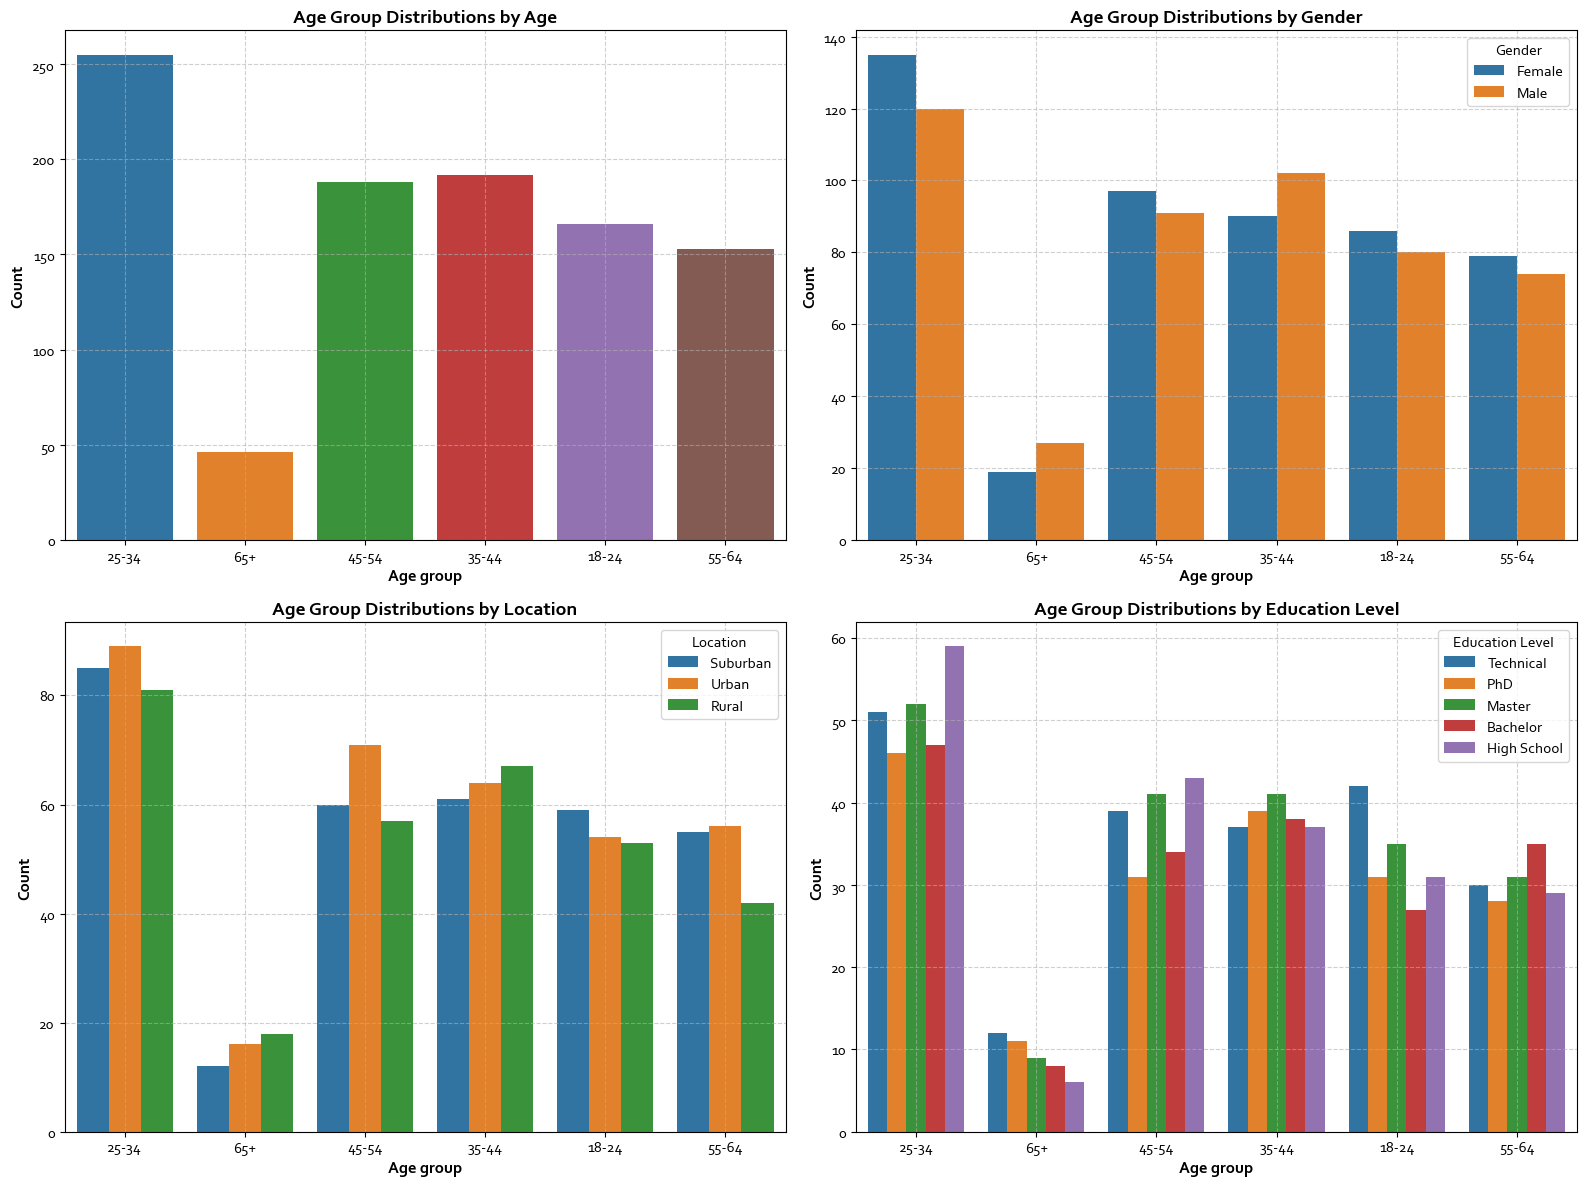

In [159]:
categories = ['Age', 'Gender', 'Location', 'Education Level']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns
axes = axes.flatten()
for i, category in enumerate(categories):
    sns.countplot(data=df, x='Age', hue=category, ax=axes[i])
    axes[i].set_title(f'Age Group Distributions by {category}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Age group', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[i].grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<h3 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>3.2: Location Distributions</h3>

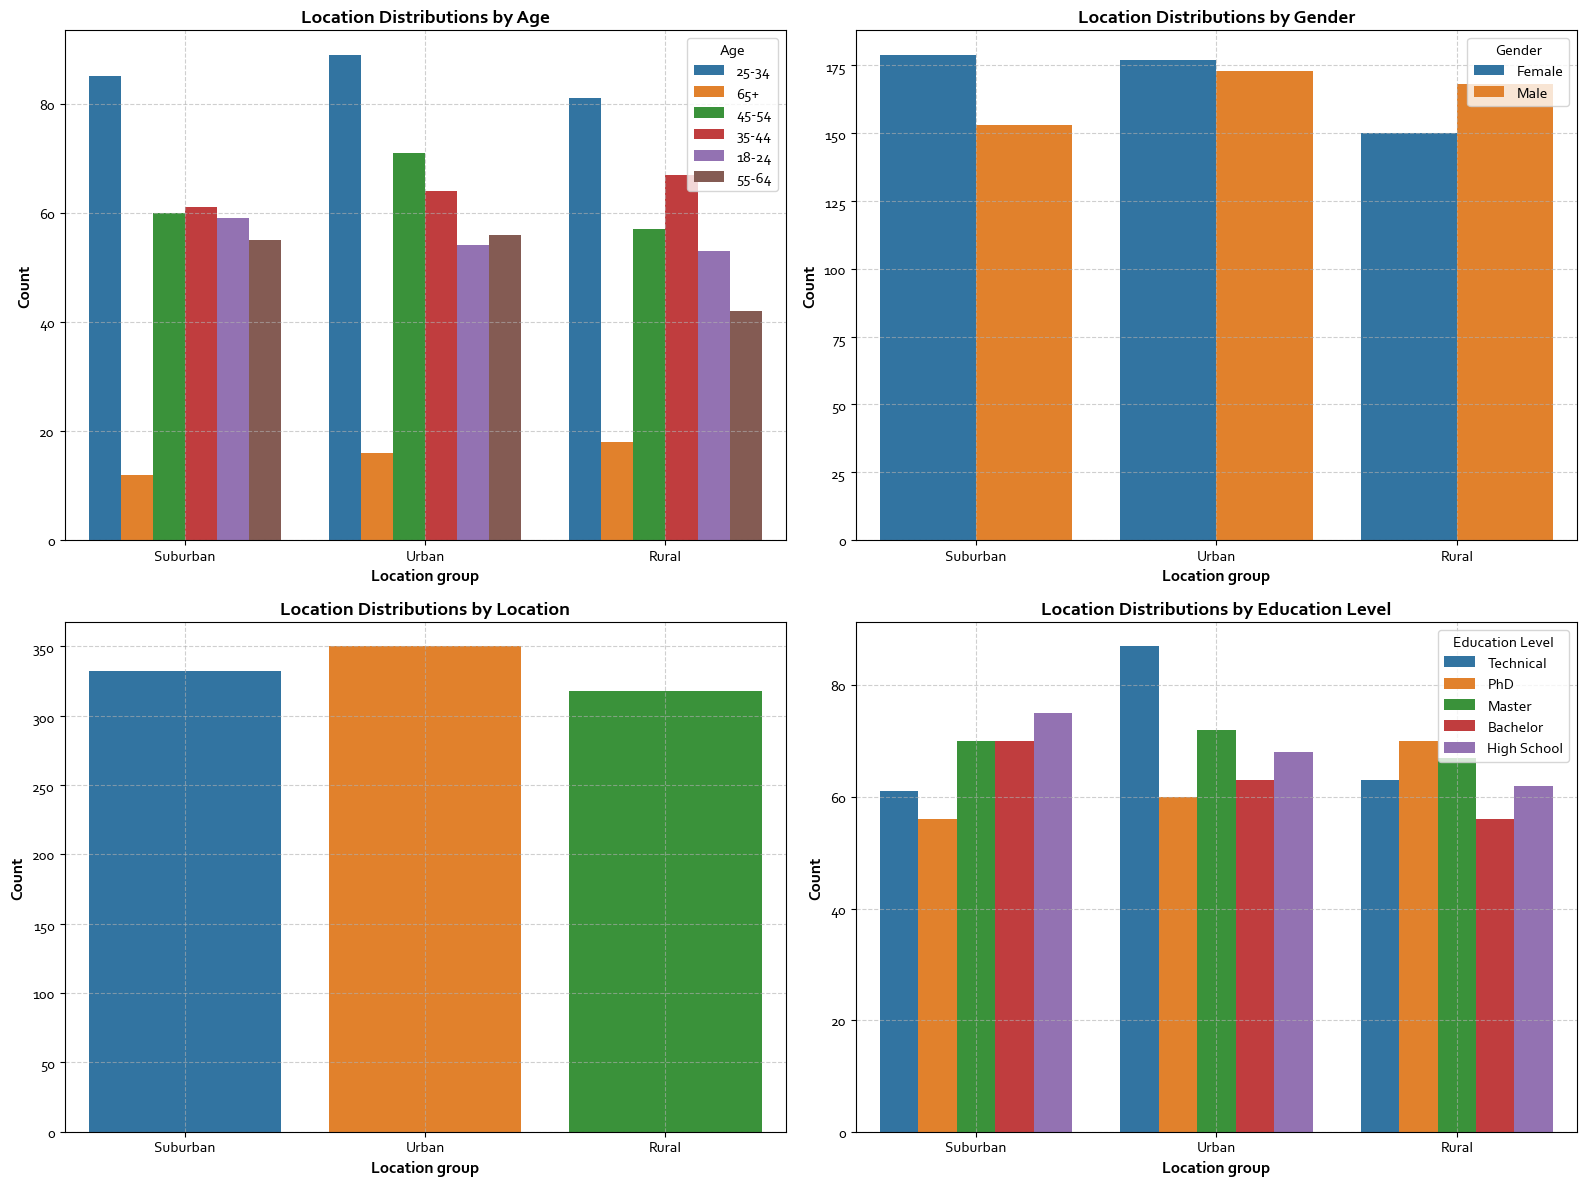

In [160]:
categories = ['Age', 'Gender', 'Location', 'Education Level']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns
axes = axes.flatten()
for i, category in enumerate(categories):
    sns.countplot(data=df, x='Location', hue=category, ax=axes[i])
    axes[i].set_title(f'Location Distributions by {category}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Location group', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[i].grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<h3 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>3.3: Gender Distributions</h3>

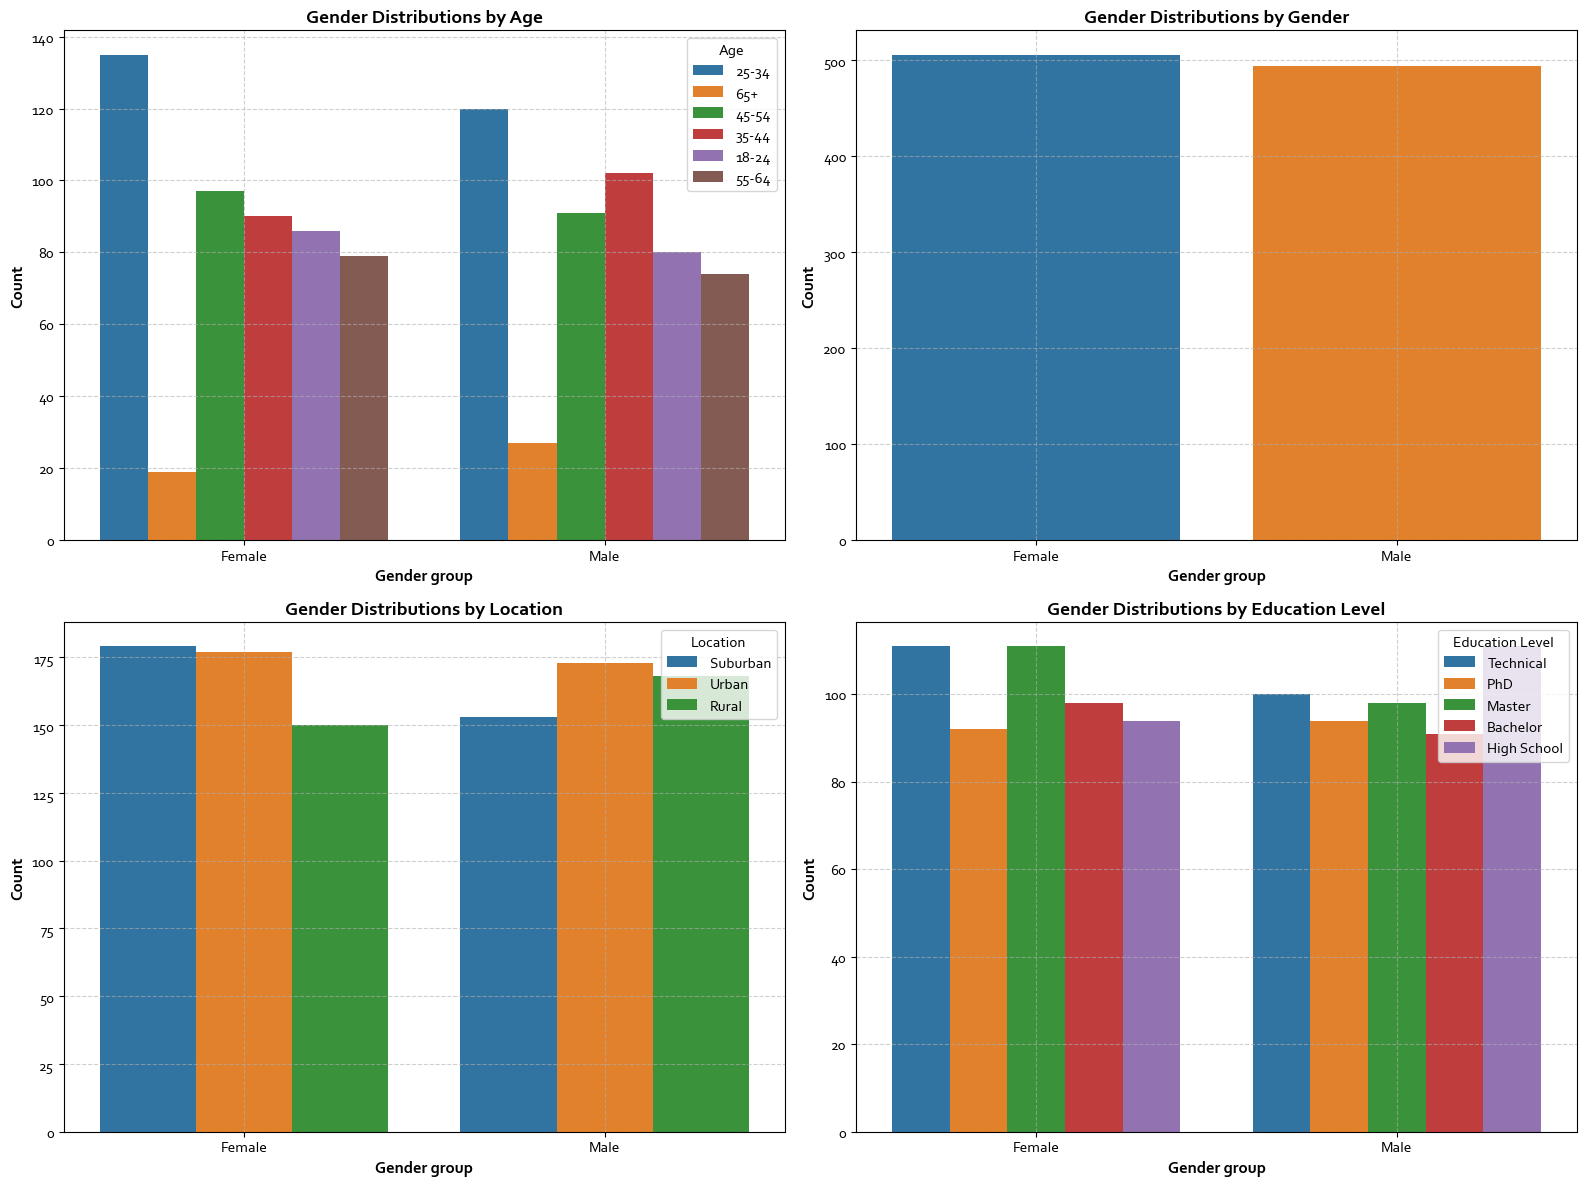

In [161]:
categories = ['Age', 'Gender', 'Location', 'Education Level']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns
axes = axes.flatten()
for i, category in enumerate(categories):
    sns.countplot(data=df, x='Gender', hue=category, ax=axes[i])
    axes[i].set_title(f'Gender Distributions by {category}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Gender group', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[i].grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<h3 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>3.4: Education Level</h3>

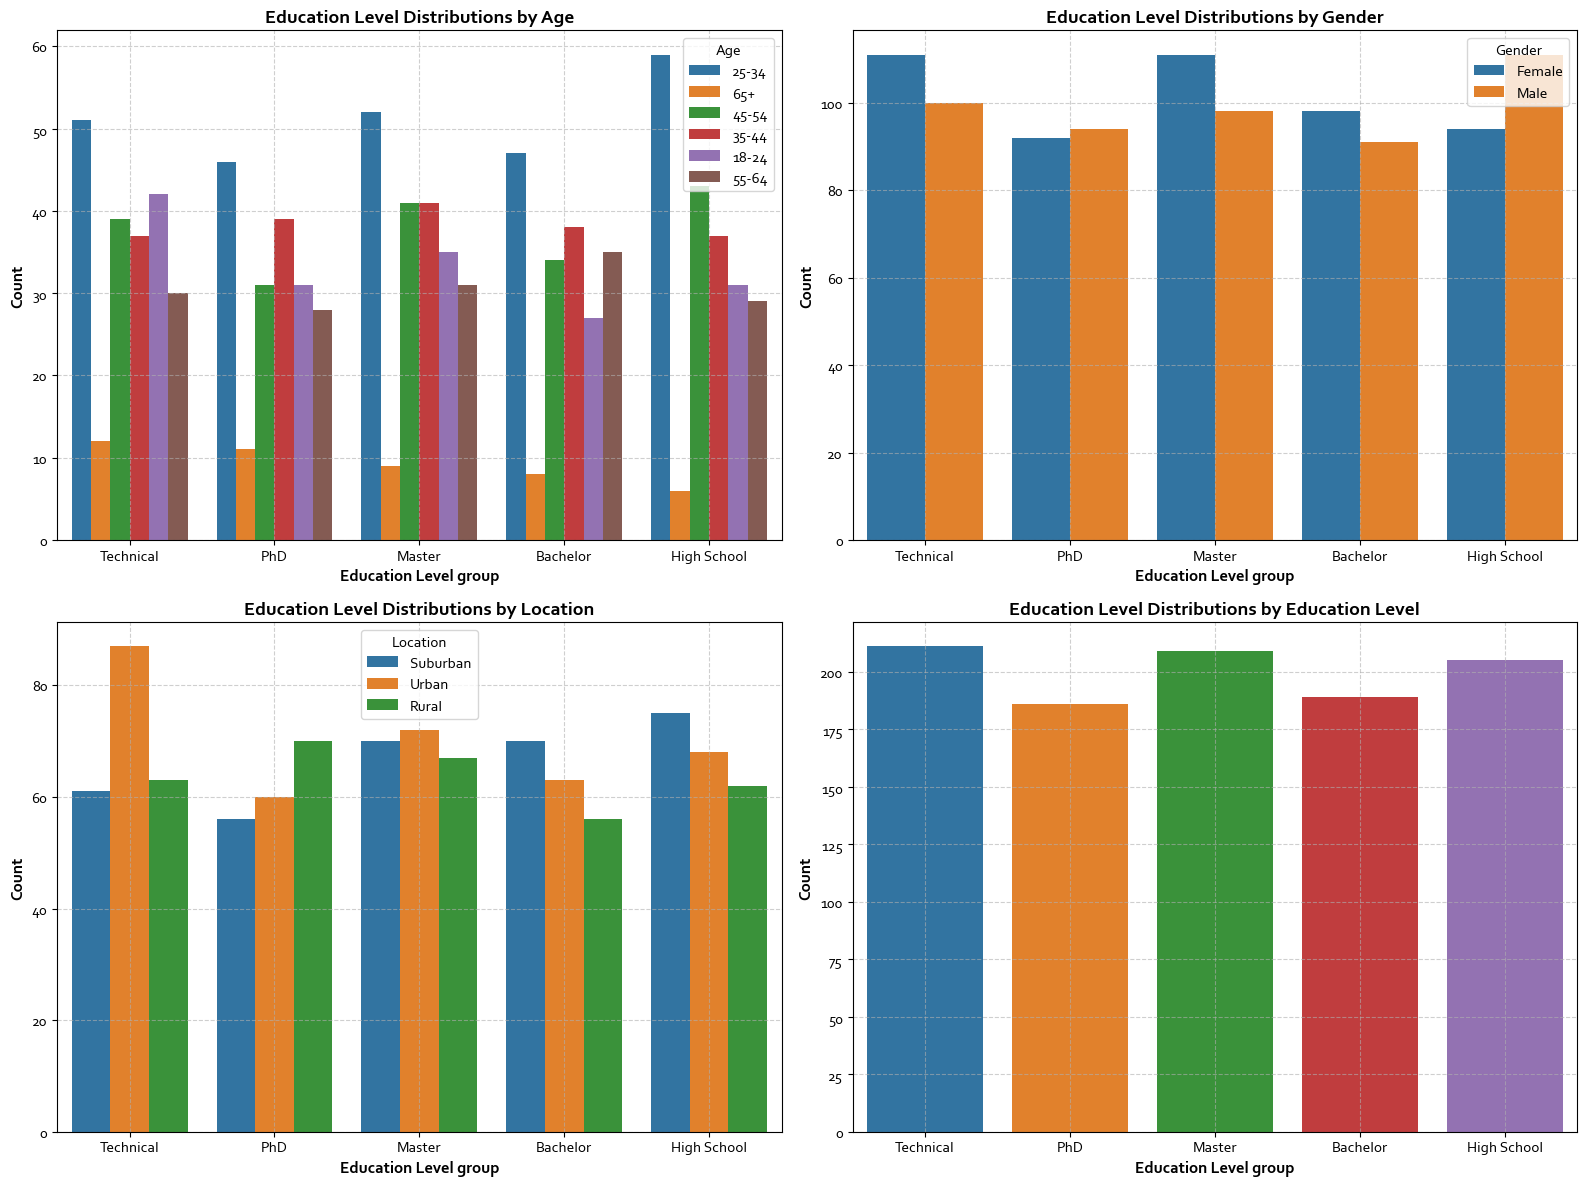

In [162]:
categories = ['Age', 'Gender', 'Location', 'Education Level']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns
axes = axes.flatten()
for i, category in enumerate(categories):
    sns.countplot(data=df, x='Education Level', hue=category, ax=axes[i])
    axes[i].set_title(f'Education Level Distributions by {category}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Education Level group', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[i].grid(linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<h3 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>3.5: Distribution of Numerical Variables Across Categorical Groups</h3>

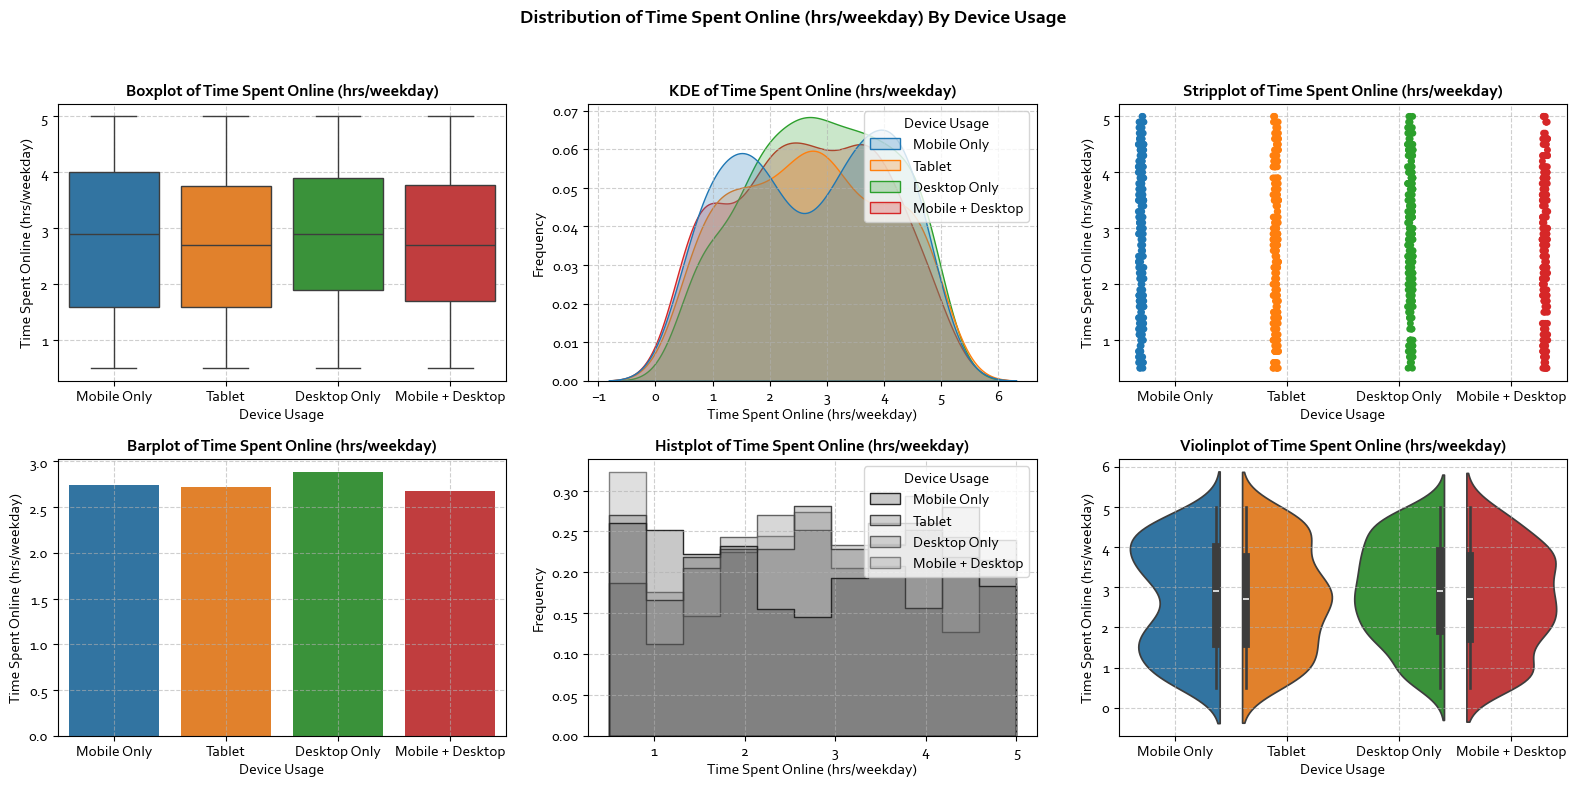

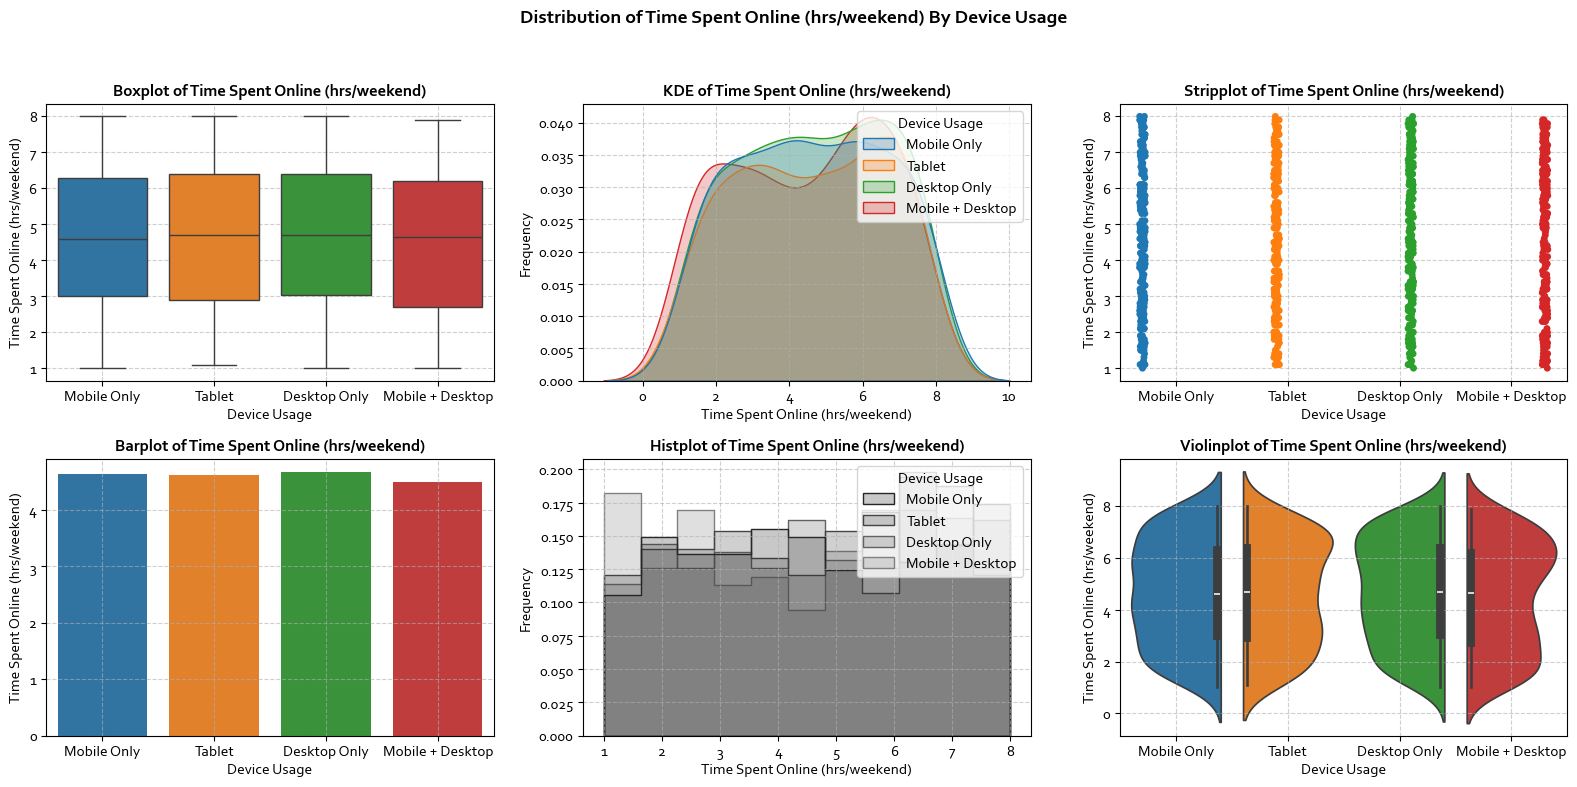

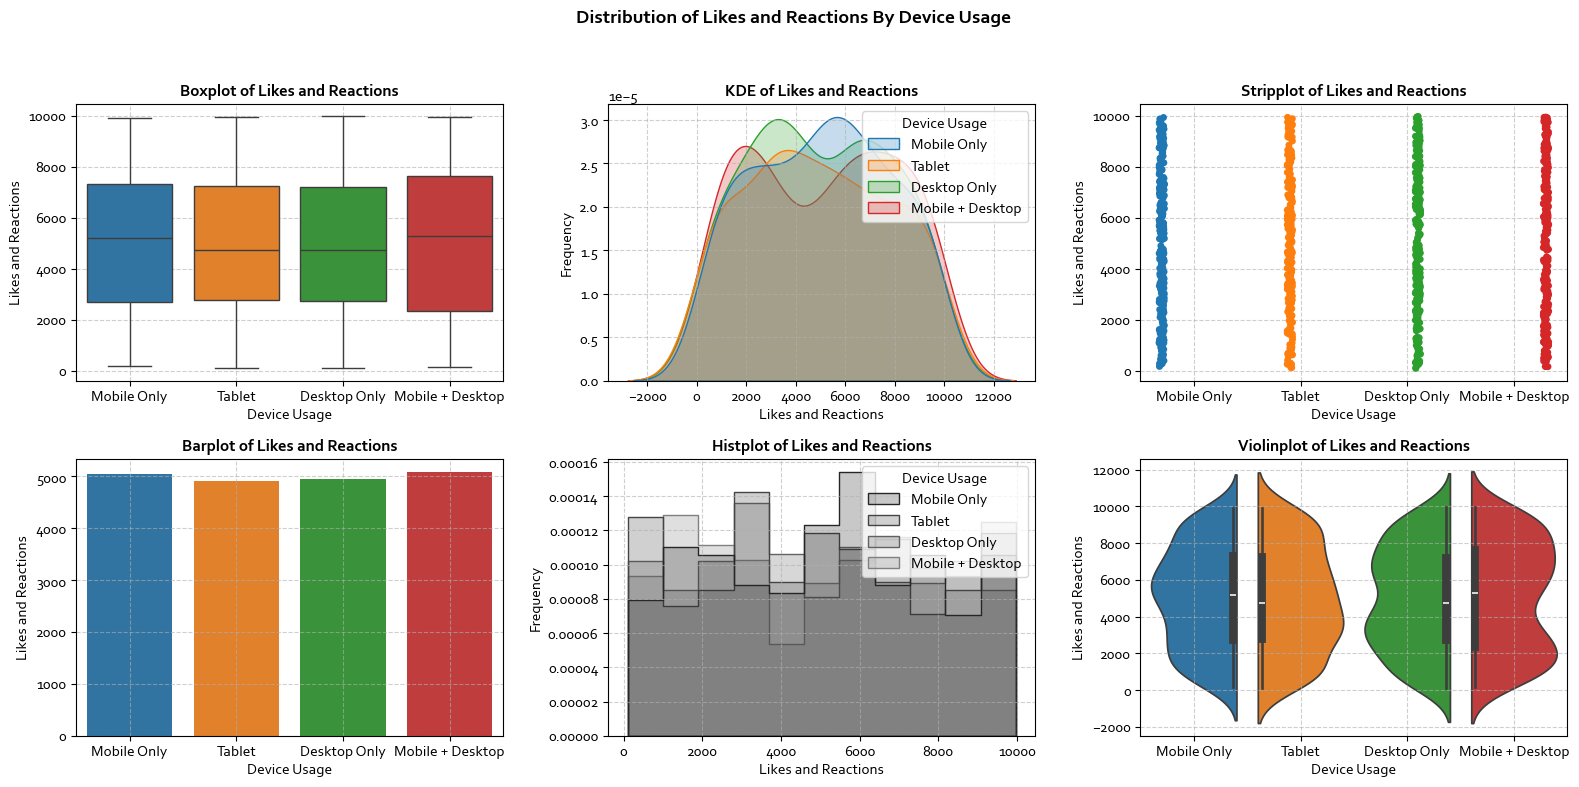

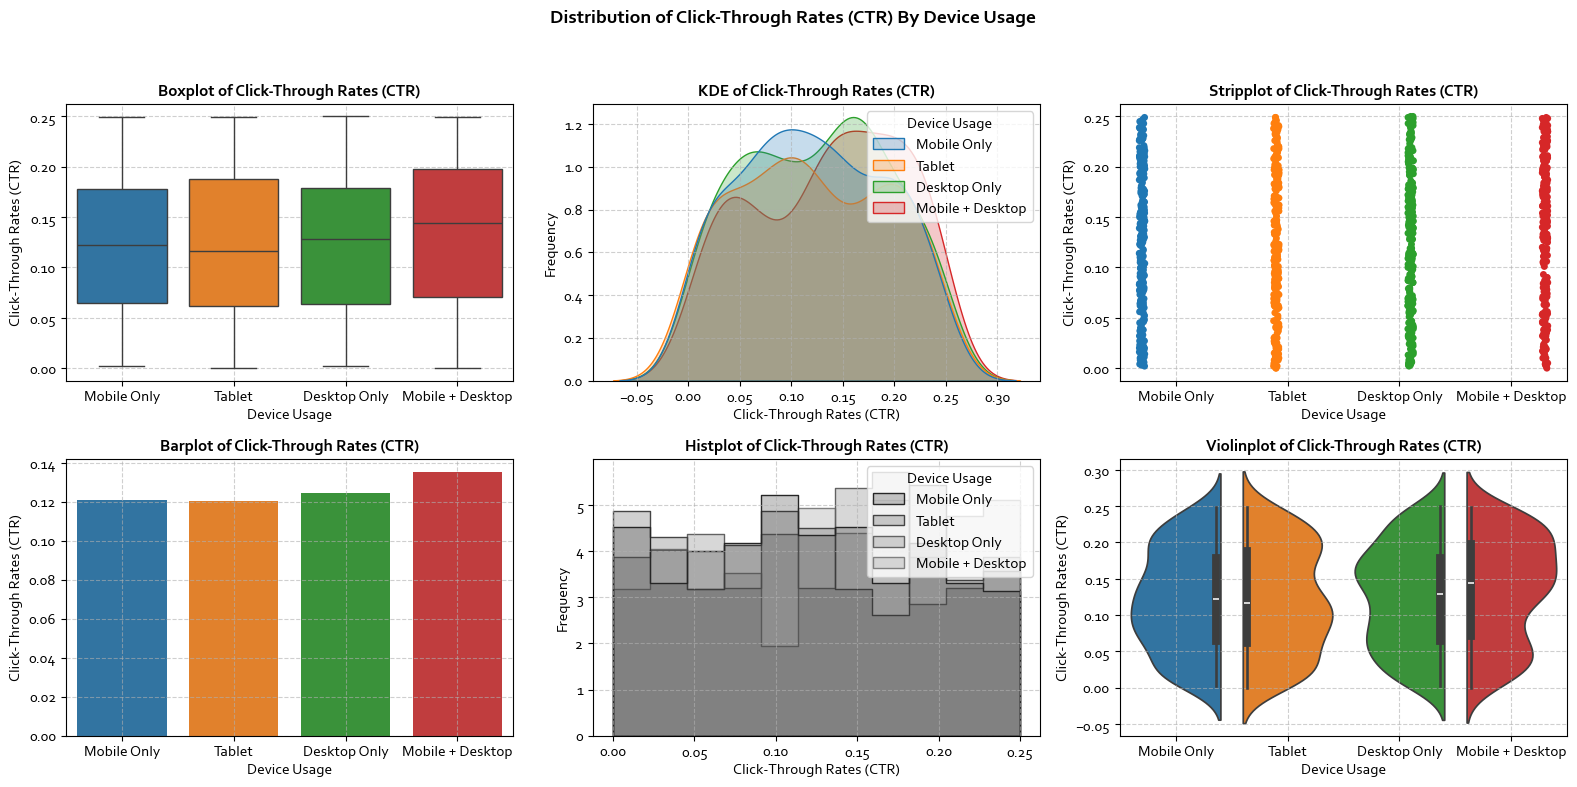

In [212]:
def create_distribution_plots(df, column, group = None, save_path=None):
    fig, axes = plt.subplots(2, 3, figsize=(16, 8))  # Adjusted layout to fit 6 plots
    plt.rcParams.update({'font.family': 'Corbel', 'font.style': 'normal', 'font.size': 11})
    fig.suptitle(f'Distribution of {column} By {group}', fontsize=14, fontweight='bold')
    
    # Define plot types and configurations
    plot_types = [
        ('Boxplot', sns.boxplot, {'x': group, 'y': column, 'hue': group}),
        ('KDE', sns.kdeplot, {'x': column, 'hue': group, 'fill': True}),
        ('Stripplot', sns.stripplot, {'x': group, 'y': column, 'hue': group, 'dodge': True}),
        ('Barplot', sns.barplot, {'x': group, 'y': column, 'hue': group, 'errorbar': None}),
        ('Histplot', sns.histplot, {'x': column, 'hue': group, 'palette': 'dark:gray', 'element': 'step', 'stat': 'density', 'common_norm': False}),
        ('Violinplot', sns.violinplot, {'x': group, 'y': column, 'hue': group, 'split': True})
    ]
    
    # Create plots
    for idx, (title, plot_func, plot_kwargs) in enumerate(plot_types):
        row, col = divmod(idx, 3)  # Adjusted to fit 2x3 layout
        plot_func(data=df, ax=axes[row, col], **plot_kwargs)
        axes[row, col].set_title(f"{title} of {column}", fontsize=12, fontweight='bold')
        axes[row, col].set_xlabel(column if 'x' in plot_kwargs and plot_kwargs['x'] == column else group)
        axes[row, col].set_ylabel('Frequency' if 'y' not in plot_kwargs else column)
        axes[row, col].grid(linestyle='--', alpha=0.6)
    
    # Adjust layout and save/show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    if save_path:
        plt.savefig(save_path)
    plt.show()

numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
for column in numeric_features:
    create_distribution_plots(df, column, group ='Device Usage')

<h2 style='font-size: 35px; color: red; font-family: Dubai; font-weight: 600'>4.0: Device Usage Patterns</h2>

Understanding device usage patterns is essential to identify how users access our platform. This insight can guide us in optimizing ad formats, delivery channels, and overall user experience. By analyzing the distribution of device usage, we can prioritize platform enhancements and align them with user preferences.

In [216]:
categories = ['Device Usage']
total_length = 100
for category in categories:
    print(f"\n{' ' * 30}Count occurrences and Proportion of each {category}:")
    counts = df[category].value_counts()
    proportions = df[category].value_counts(normalize=True)
    for value, count in counts.items():
        proportion = proportions[value]
        text_length = len(f"{category}: {value}")
        remaining_length = total_length - text_length - len(str(count)) - len(f"{proportion:.2%}") - 3
        print(f"{category}: {value} {'.' * remaining_length} {count} ({proportion:.2%})")


                              Count occurrences and Proportion of each Device Usage:
Device Usage: Desktop Only .............................................................. 262 (26.20%)
Device Usage: Mobile Only ............................................................... 253 (25.30%)
Device Usage: Mobile + Desktop .......................................................... 250 (25.00%)
Device Usage: Tablet .................................................................... 235 (23.50%)


The distribution of device usage across the sample shows that the most common device usage is Desktop, accounting for 26.20% of the total responses with 262 occurrences. Mobile follows closely with 25.30% (253 occurrences). The combination of Mobile + Desktop devices represents 25.00% of the sample (250 occurrences). Lastly, Tablet usage accounts for 23.50% of the responses, with 235 occurrences. This indicates a relatively balanced distribution among the different device usage categories, with Desktop slightly leading, followed by Mobile and the combined usage of Mobile + Desktop.

<h2 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>5.0: Common Interests Among Users</h2>

Identifying the most common interests among users is essential for effective audience segmentation and personalized ad campaign development. By understanding what users care about most, businesses can create targeted content and advertisements that align with their preferences, ultimately enhancing engagement and maximizing the impact of marketing strategies.

In [150]:

# Splitting the 'Top Interests' into individual interests and counting occurrences
interests_list = df['Top Interests'].str.split(', ').sum()
interests_counter = Counter(interests_list)
n = 20  # Number of top interests to display

interests_df = (
    pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency'])
    .sort_values(by='Frequency', ascending=False)
    .head(n)  # Select the top `n` interests
)

# Calculate proportions
total_count = interests_df['Frequency'].sum()
interests_df['Proportion'] = interests_df['Frequency'] / total_count

# Format the output similar to the one you provided
category = 'Interest'  # Category name
total_length = 100  # Total line length for alignment

print(f"\n{' ' * 35}# Count occurrences of each {category}:")

# Loop through the interests, their counts, and proportions
for value, count, proportion in interests_df.itertuples(index=False):
    text_length = len(f"{category}: {value}")
    proportion_str = f"({proportion:.2%})"  # Format proportion as percentage
    remaining_length = total_length - text_length - len(str(count)) - len(proportion_str) - 2
    print(f"{category}: {value} {'.' * remaining_length} {count} {proportion_str}")


                                   # Count occurrences of each Interest:
Interest: Digital Marketing ............................................................. 182 (7.22%)
Interest: Investing and Finance ......................................................... 171 (6.78%)
Interest: Music Production .............................................................. 169 (6.70%)
Interest: Fitness and Wellness .......................................................... 167 (6.62%)
Interest: Eco-Friendly Living ........................................................... 163 (6.46%)
Interest: Fashion Modelling ............................................................. 161 (6.38%)
Interest: Gourmet Cooking ............................................................... 157 (6.23%)
Interest: Reading and Literature ........................................................ 156 (6.19%)
Interest: Gaming ........................................................................ 155 (6.15%)
Interest

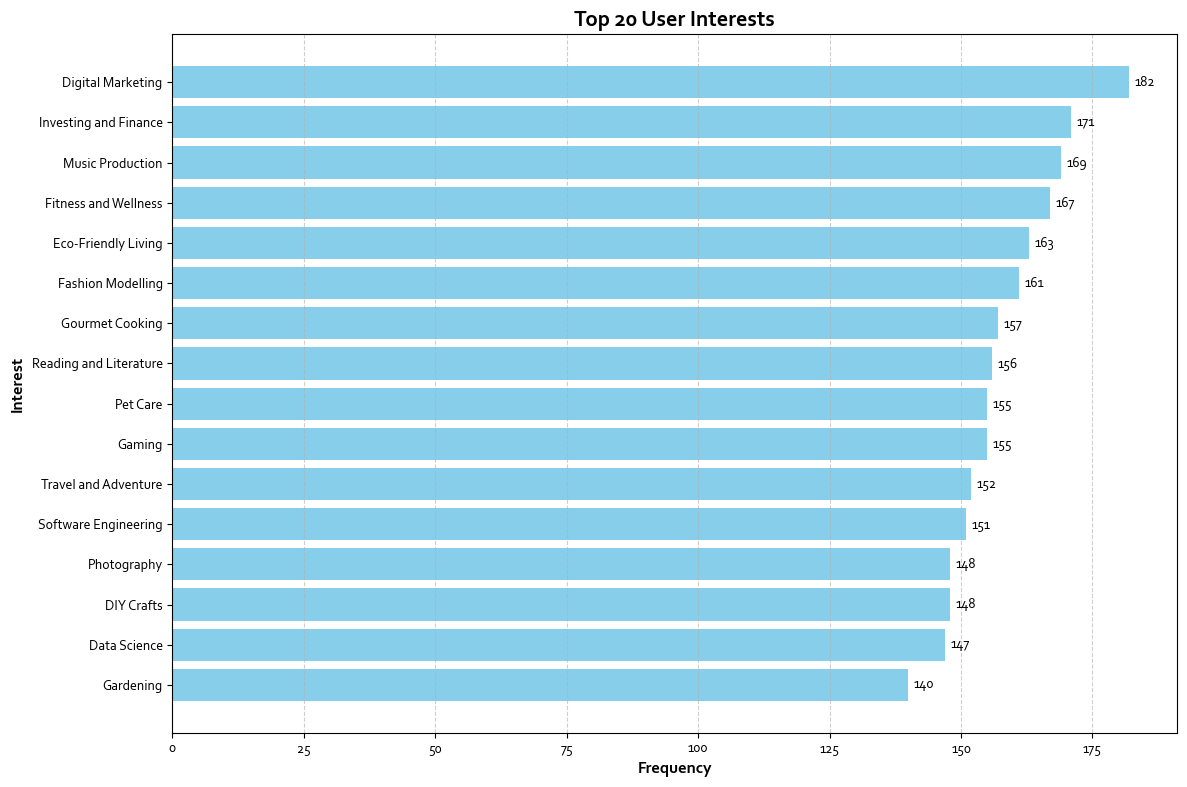

In [149]:
interests_list = df['Top Interests'].str.split(', ').sum()
interests_counter = Counter(interests_list)
n = 20
interests_df = ( 
    pd.DataFrame(interests_counter.items(), columns=['Interest', 'Frequency'])
    .sort_values(by='Frequency', ascending=True)
    .tail(n)  # Select the top `n` interests
)



plt.figure(figsize=(12, 8))  # Set figure size
bars = plt.barh(interests_df['Interest'], interests_df['Frequency'], color='skyblue')
for bar in bars:
    plt.text( bar.get_width() + 1, 
             bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', 
             va='center', fontsize=10 )

plt.title(f'Top {n} User Interests', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Interest', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()  
plt.show()

<h2 style='font-size: 35px; color: Green; font-family: Dubai; font-weight: 600'>6.0: Users’ Online Behavior Analysis</h2>


Understanding users’ online behavior is critical to optimizing content, advertisements, and engagement strategies. This section examines key patterns in user activity and interest, with a focus on how they engage with both organic content and ads. The analysis is designed to uncover actionable insights for improving ad targeting and delivery. This analysis provides a foundation for designing data-driven marketing campaigns that align with users’ behavior and interests. Let’s begin by analyzing device usage patterns as the first step.

<h3 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>6.1:  User Profiling and Segmentation</h3>


We can now segment users into distinct groups for targeted ad campaigns. Segmentation can be based on various criteria, such as:

- **Demographics**: Age, Gender, Income Level, Education Level
- **Behavioural**: Time Spent Online, Likes and Reactions, CTR, Conversion Rates
- **Interests**: Aligning ad content with the top interests identified
- 
To implement user profiling and segmentation, we can apply ``clustering techniques`` or develop personas based on the combination of these attributes. This approach enables the creation of more personalized and effective ad campaigns, ultimately enhancing user engagement and conversion rates.

Let’s start by selecting a subset of features that could be most indicative of user preferences and behaviour for segmentation and apply a clustering algorithm to create user segments.

In [217]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [218]:
# Step 1: Selecting features for clustering
features = [
    'Age', 'Gender', 'Income Level', 
    'Time Spent Online (hrs/weekday)', 
    'Time Spent Online (hrs/weekend)', 
    'Likes and Reactions', 
    'Click-Through Rates (CTR)'
]
X = df[features]  # Extracting the selected features from the DataFrame

# Step 2: Defining preprocessing for numerical and categorical features
# Numerical features and their transformer
numeric_features = [
    'Time Spent Online (hrs/weekday)', 
    'Time Spent Online (hrs/weekend)', 
    'Likes and Reactions', 
    'Click-Through Rates (CTR)'
]
numeric_transformer = StandardScaler()

# Categorical features and their transformer
categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

# Step 3: Combining preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Process numeric features
        ('cat', categorical_transformer, categorical_features)  # Process categorical features
    ]
)

# Step 4: Creating a pipeline for preprocessing and clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('cluster', KMeans(n_clusters=5, random_state=42))  # Clustering step
])

# Step 5: Fitting the pipeline to the data
pipeline.fit(X)

# Step 6: Assigning cluster labels to the DataFrame
df['Cluster'] = pipeline.named_steps['cluster'].labels_

# Step 7: Displaying a sample of the data with cluster assignments
df.sample(5)

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
18,19,35-44,Female,Urban,English,Master,8511,74,Tablet,5.0,6.3,0.012,0.069,109,100k+,"Fitness and Wellness, Travel and Adventure, Ga...",3
940,941,25-34,Female,Urban,Mandarin,PhD,6501,258,Desktop Only,4.0,3.3,0.005,0.068,173,100k+,"Gardening, Fitness and Wellness",3
956,957,35-44,Male,Urban,Mandarin,High School,8468,144,Mobile + Desktop,4.6,5.0,0.021,0.086,7,60k-80k,Digital Marketing,3
294,295,18-24,Female,Urban,Spanish,PhD,4186,150,Desktop Only,4.8,5.9,0.244,0.058,140,80k-100k,"Gaming, Pet Care",0
184,185,25-34,Female,Rural,English,Technical,9662,389,Tablet,1.9,5.9,0.069,0.067,144,60k-80k,"Gardening, Gaming, Pet Care",3


*The clustering process successfully segmented users into five distinct groups (Clusters 0 to 4), each representing a unique profile based on the selected features, such as age, gender, income level, online behavior, and engagement metrics. These clusters provide valuable insights into user preferences and behaviors, forming a strong foundation for designing personalized ad campaigns that resonate with the specific characteristics of each segment.*

<h3 style='font-size: 25px; color: Green; font-family: Dubai; font-weight: 600'>6.2: Cluster Exploration  </h3>

To understand the defining characteristics of each cluster, we will calculate the mean values for numerical features and determine the mode for categorical features. This analysis will provide a clear profile of each cluster, highlighting the key traits that differentiate them.

<h4 style='font-size: 20px; color: purple; font-family: Dubai; font-weight: 600'>6.2.1: Distributions of Categorical Variables Across Cluster</h4>

In [186]:
categories = ['Age', 'Gender', 'Location', 'Education Level']  # List of categories to compare
group_column = 'Cluster'  # Example grouping column
total_length = 120  # Total line length for formatting

for category in categories:
    if category == group_column:
        continue  # Skip comparing the group_column with itself

    print(f"\n{' ' * 45}Distribution of {category} across {group_column}:")
    grouped = df.groupby(group_column)[category].value_counts(normalize=False)  # Counts
    grouped_proportions = df.groupby(group_column)[category].value_counts(normalize=True)  # Proportions
    
    # Iterate through each group and its counts
    for group, values in grouped.groupby(level=0):  # Level 0 is the group_column
        print(f"\n{group_column}: {group}")
        for (g, value), count in values.items():
            proportion = grouped_proportions[(group, value)]
            text_length = len(f"{category}: {value}")
            remaining_length = total_length - text_length - len(str(count)) - len(f"{proportion:.2%}") - 3
            
            print(f"{category}: {value} {'.' * remaining_length} {count} ({proportion:.2%})")



                                             Distribution of Age across Cluster:

Cluster: 0
Age: 25-34 ................................................................................................... 49 (22.69%)
Age: 35-44 ................................................................................................... 47 (21.76%)
Age: 45-54 ................................................................................................... 43 (19.91%)
Age: 18-24 ................................................................................................... 35 (16.20%)
Age: 55-64 ................................................................................................... 33 (15.28%)
Age: 65+ ....................................................................................................... 9 (4.17%)

Cluster: 1
Age: 35-44 ................................................................................................... 37 (22.42%)
Age: 25-34 ......................

<h4 style='font-size: 20px; color: purple; font-family: Dubai; font-weight: 600'>6.3.1: Visual Distributions of Categorical Variables Across Cluster</h4>

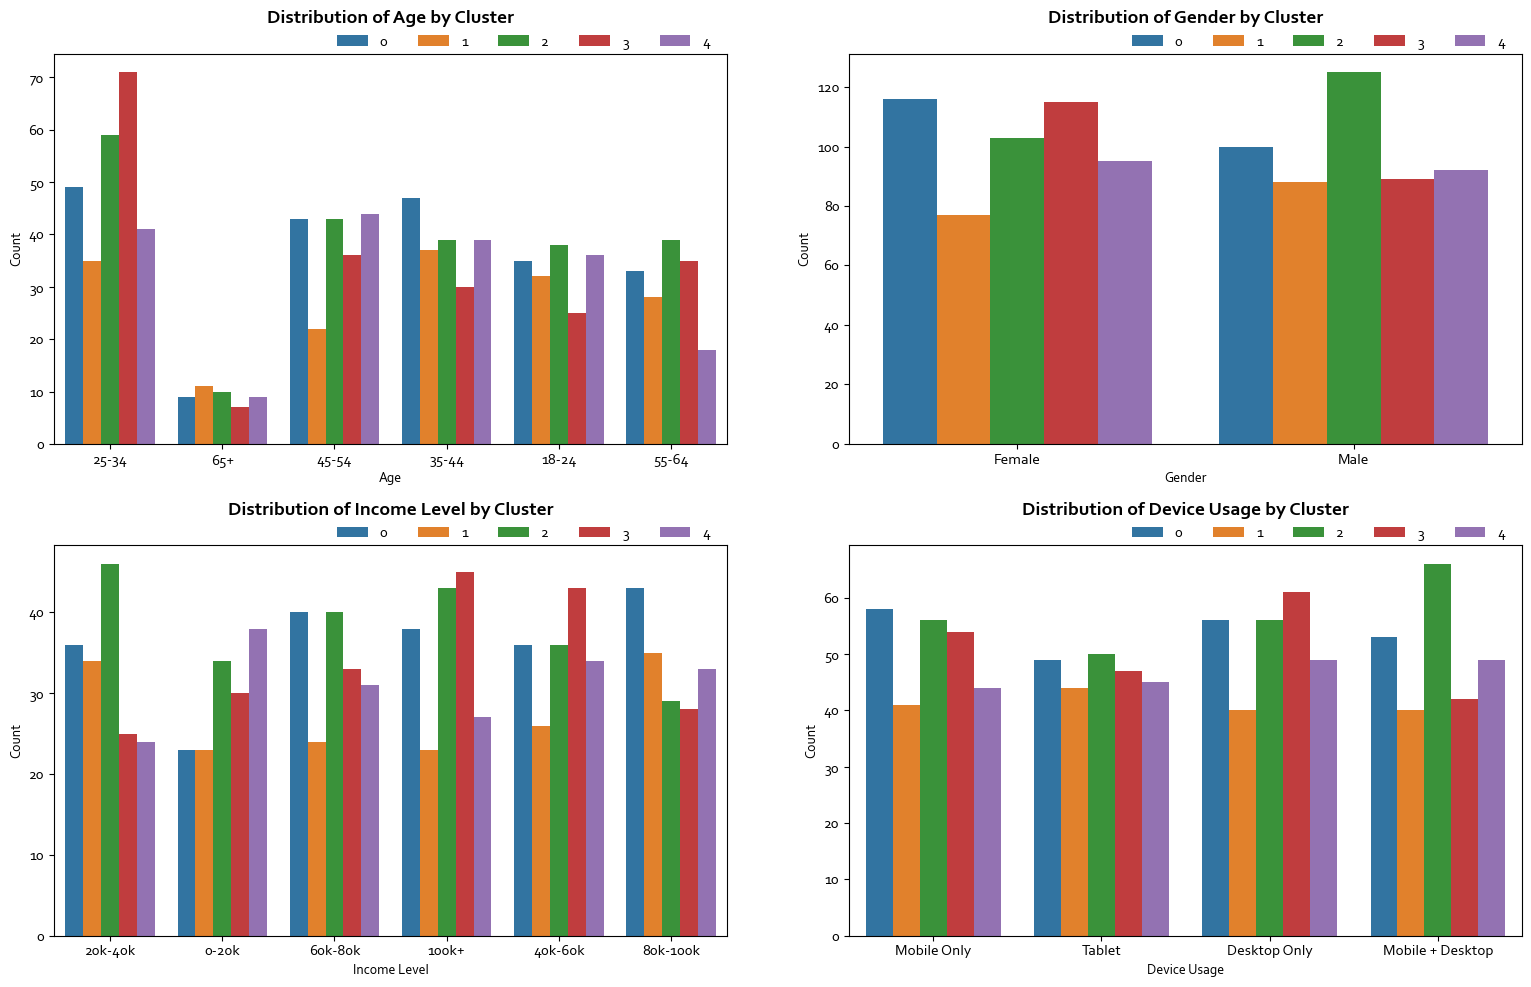

In [187]:
features = ['Age', 'Gender', 'Income Level', 'Device Usage']
num_features = len(features)
grid_size = (2, (num_features + 1) // 2)  # Adjust grid size based on number of features
fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    if feature in ['Age', 'Gender', 'Income Level', 'Device Usage']:
        # Categorical feature: use count plot
        sns.countplot( data=df,  x=feature,  hue='Cluster',  palette='tab10',  ax=ax, legend=True)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.legend(loc='center left', bbox_to_anchor=(0.4, 1.03), ncol=5, frameon=False)
        ax.set_title(f'Distribution of {feature} by Cluster', fontsize=14, fontweight='bold', pad=22)
# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<h4 style='font-size: 20px; color: purple; font-family: Dubai; font-weight: 600'>6.4.1: Distributions of Numerical Variables Across Cluster</h4>

In [190]:
result = compute_group_distribution_stats(df, group_column='Cluster')
result.head(10)

,Cluster,Variable,Mean,SEM,Median,Mode,Standard Deviation,Variance,Coefficient of Variation,Range,Skewness,Kurtosis
0,0,User ID,507.217593,19.766925,515.0,3.0,290.513281,8.439797e+04,57.275868,993.0,-0.035172,-1.294887
1,1,User ID,485.575758,23.100782,461.0,2.0,296.734918,8.805161e+04,61.109912,998.0,0.121758,-1.216399
2,2,User ID,486.543860,20.438700,499.0,1.0,308.617598,9.524482e+04,63.430581,997.0,0.028357,-1.302564
3,3,User ID,517.098039,19.176028,503.5,4.0,273.888457,7.501489e+04,52.966447,993.0,-0.041646,-1.027948
4,4,User ID,504.818182,19.881218,510.0,9.0,271.871568,7.391415e+04,53.855344,990.0,-0.027049,-1.111849
5,0,Likes and Reactions,2409.620370,111.848806,2062.5,645.0,1643.835018,2.702194e+06,68.219668,6998.0,0.767908,-0.049472
6,1,Likes and Reactions,5005.121212,190.383112,4913.0,1116.0,2445.515350,5.980545e+06,48.860262,9730.0,0.043109,-0.785668
7,2,Likes and Reactions,6861.587719,137.282421,7081.5,6203.0,2072.919103,4.296994e+06,30.210488,8906.0,-0.510697,-0.491755
8,3,Likes and Reactions,7457.602941,119.513942,7707.0,6356.0,1707.000528,2.913851e+06,22.889399,7152.0,-0.471522,-0.673139
9,4,Likes and Reactions,3021.219251,143.520348,2770.0,2259.0,1962.611243,3.851843e+06,64.960901,9064.0,0.521066,-0.396431


<h4 style='font-size: 20px; color: purple; font-family: Dubai; font-weight: 600'>6.5.1: Visual Distributions of Numerical Variables Across Cluster</h4>

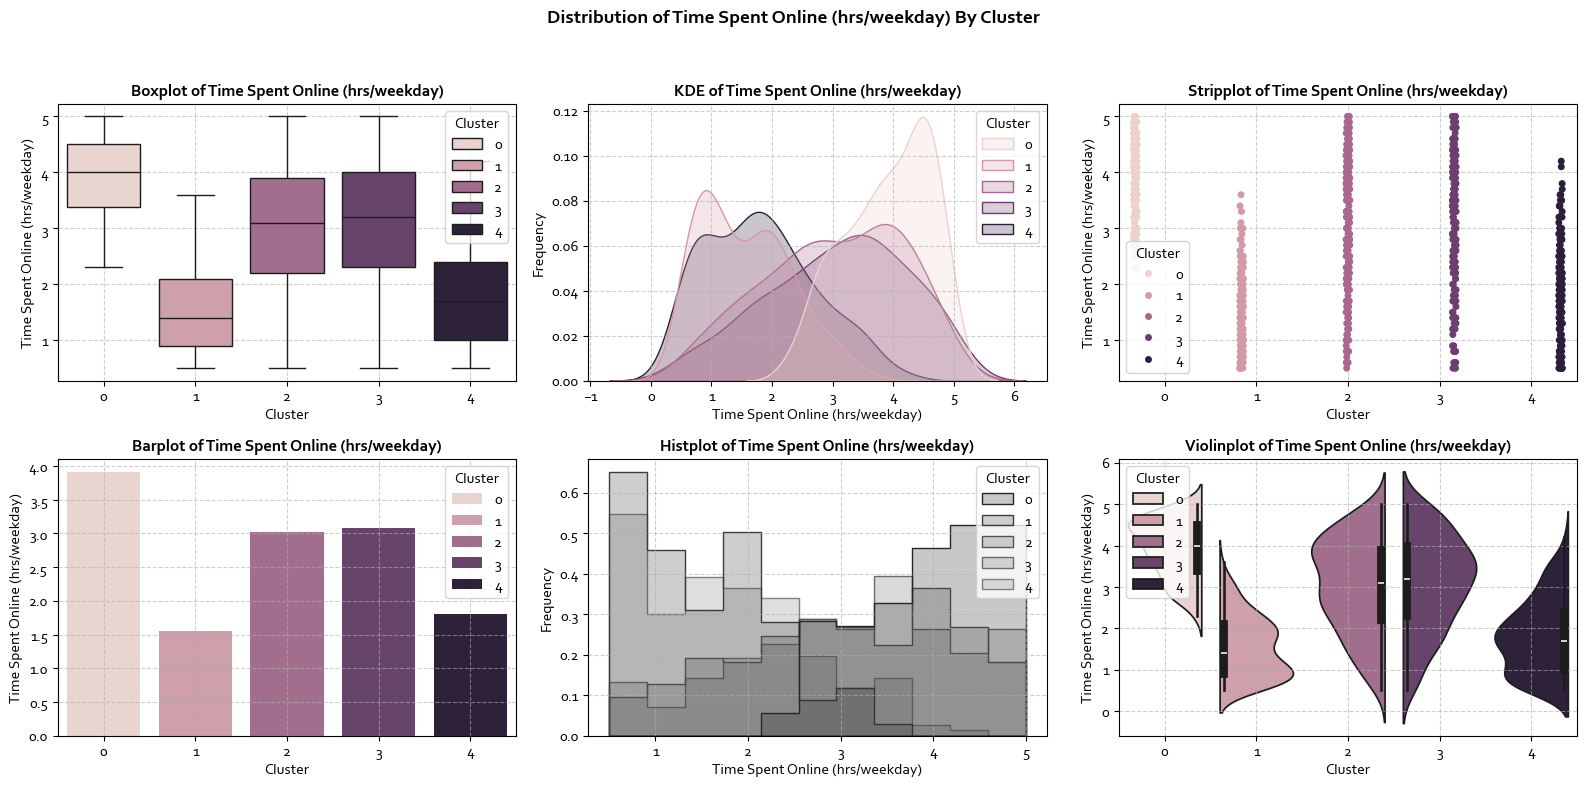

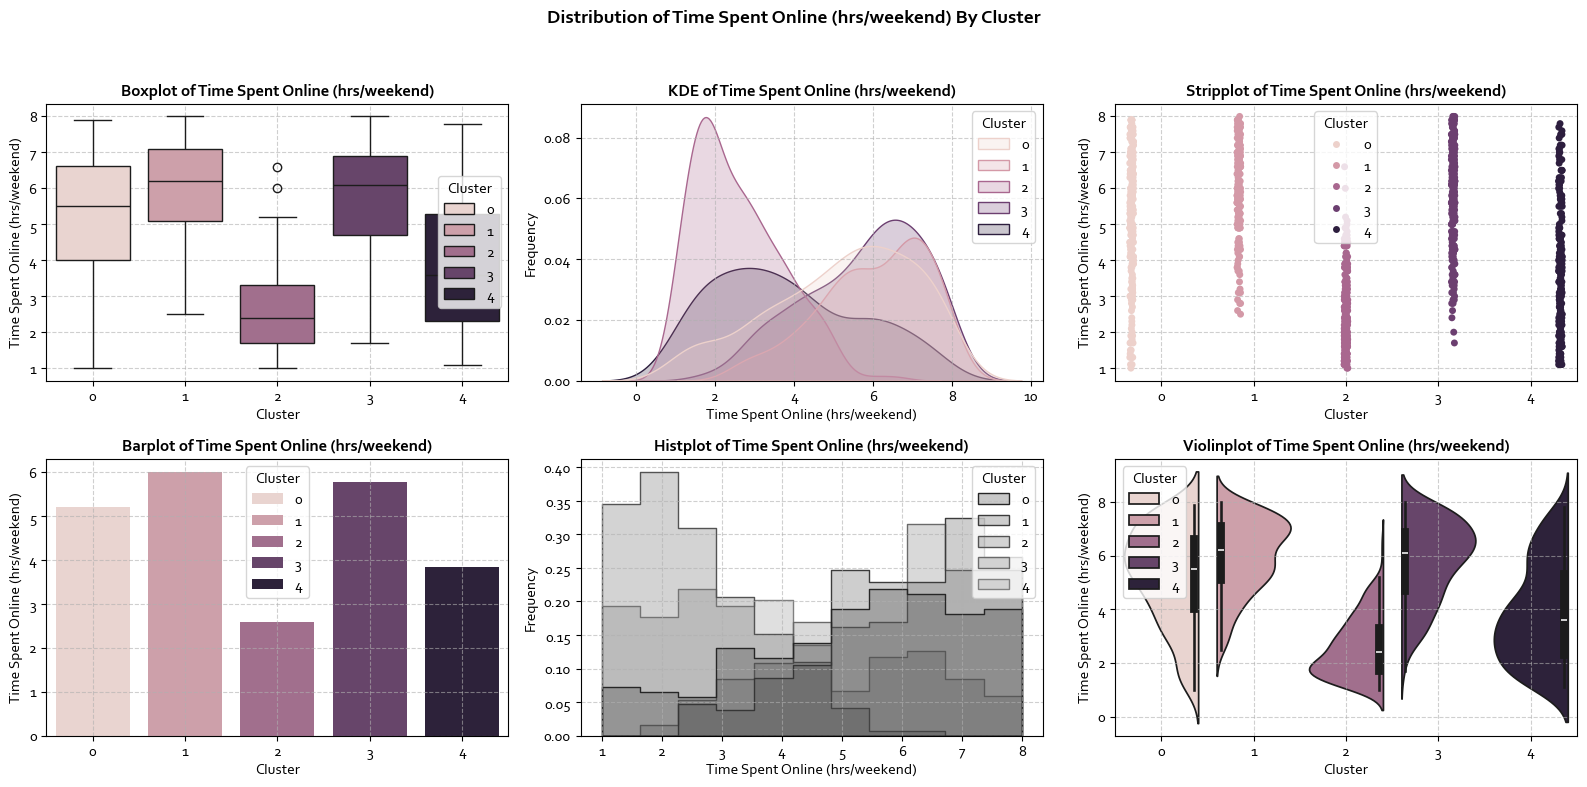

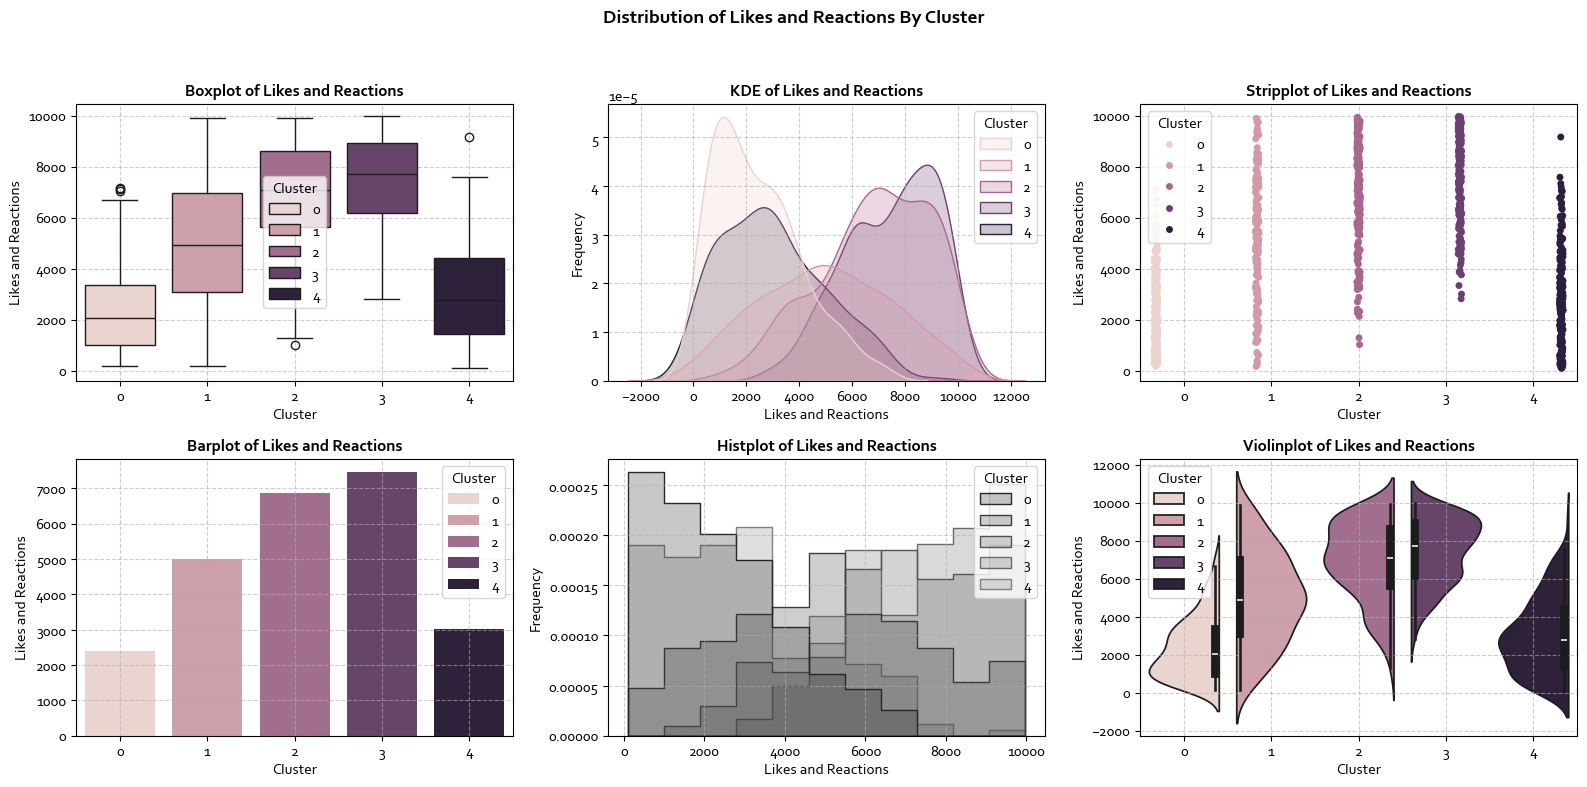

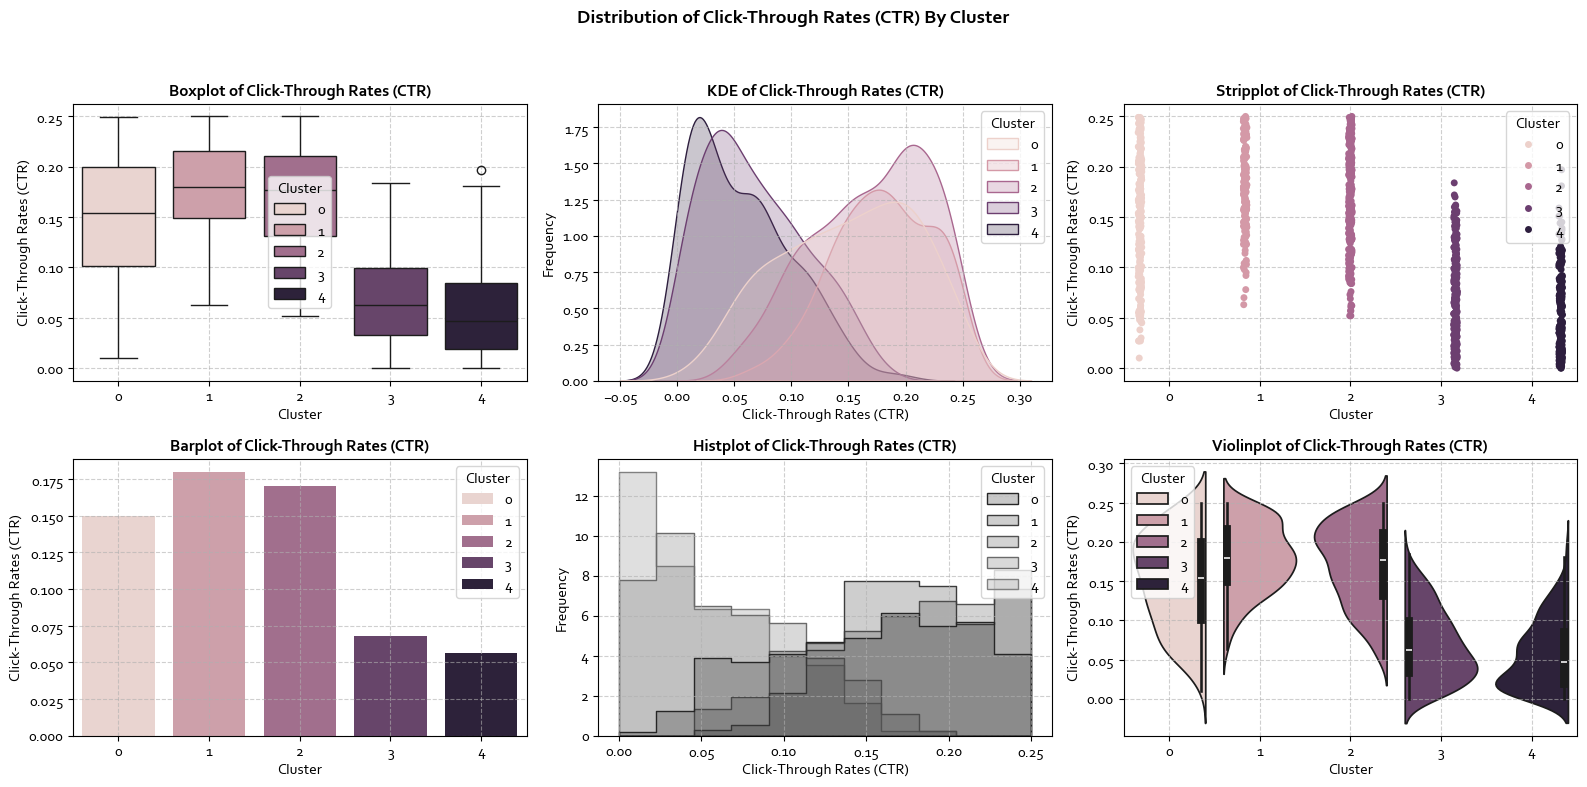

In [219]:
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
for column in numeric_features:
    create_distribution_plots(df, column, group ='Cluster')

<h4 style='font-size: 20px; color: purple; font-family: Dubai; font-weight: 600'>6.6.1: Overall Distributions of Clusters</h4>

In [220]:
# Step 1: Compute the mean values of numerical features for each cluster
cluster_means = df.groupby('Cluster')[numeric_features].mean()

# Step 2: Compute the mode for categorical features within each cluster
for feature in categorical_features:
    mode_series = df.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

# Step 3: Display the resulting cluster means with categorical modes
cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,3.911111,5.212963,2409.620370,0.149588,25-34,Female,80k-100k
1,1.559394,6.002424,5005.121212,0.179836,35-44,Male,80k-100k
2,3.019737,2.584211,6861.587719,0.170614,25-34,Male,20k-40k
3,3.080882,5.774510,7457.602941,0.067971,25-34,Female,100k+
4,1.809626,3.839572,3021.219251,0.056594,45-54,Female,0-20k


Based on the cluster analysis, we have assigned meaningful names to each segment, reflecting their defining characteristics. The names are derived from the patterns in their online behavior, engagement, and demographic attributes:

**Cluster 0 – Weekend Warriors**:  
This group is characterized by high online activity during weekends and moderate engagement through likes and reactions. They are predominantly female, aged 25-34, with an income level of 80k-100k.

**Cluster 1 – Engaged Professionals**:  
These users exhibit a balanced online presence throughout the week, with notably high engagement in likes and reactions. They are mostly male, aged 35-44, and have a high income range of 80k-100k.

**Cluster 2 – Low-Key Users**:  
This segment shows moderate to high online activity on weekends but lower overall engagement. They are primarily male, aged 25-34, with an income of 20k-40k, and exhibit a relatively lower Click-Through Rate (CTR).

**Cluster 3 – Active Explorers**:  
With high online activity and moderate engagement, this group is mostly female, aged 25-34, with an income level of 100k+, yet they show a lower rate of likes and reactions. This segment tends to explore more but engage less.

**Cluster 4 – Budget Browsers**:  
This group shows moderate online activity, primarily on weekends, but has the lowest engagement in terms of likes and reactions. Predominantly female and aged 45-54, their income level is the lowest, ranging from 0-20k, and they exhibit lower CTR.

By naming the clusters based on their key traits, we can now tailor strategies, such as targeted marketing or content recommendations, to better match the unique behaviors and preferences of each segment.

<h3 style='font-size: 25px; color: purple; font-family: Dubai; font-weight: 600'>6.3.0: Comparison of User Segments Based on Online Behavior and Engagement Metrics</h3>


Now, let’s create a visualization that reflects these segments, using the cluster means for numerical features and highlighting the distinctive characteristics of each segment. We’ll create a radar chart that compares the mean values of selected features across the clusters, providing a visual representation of each segment’s profile:

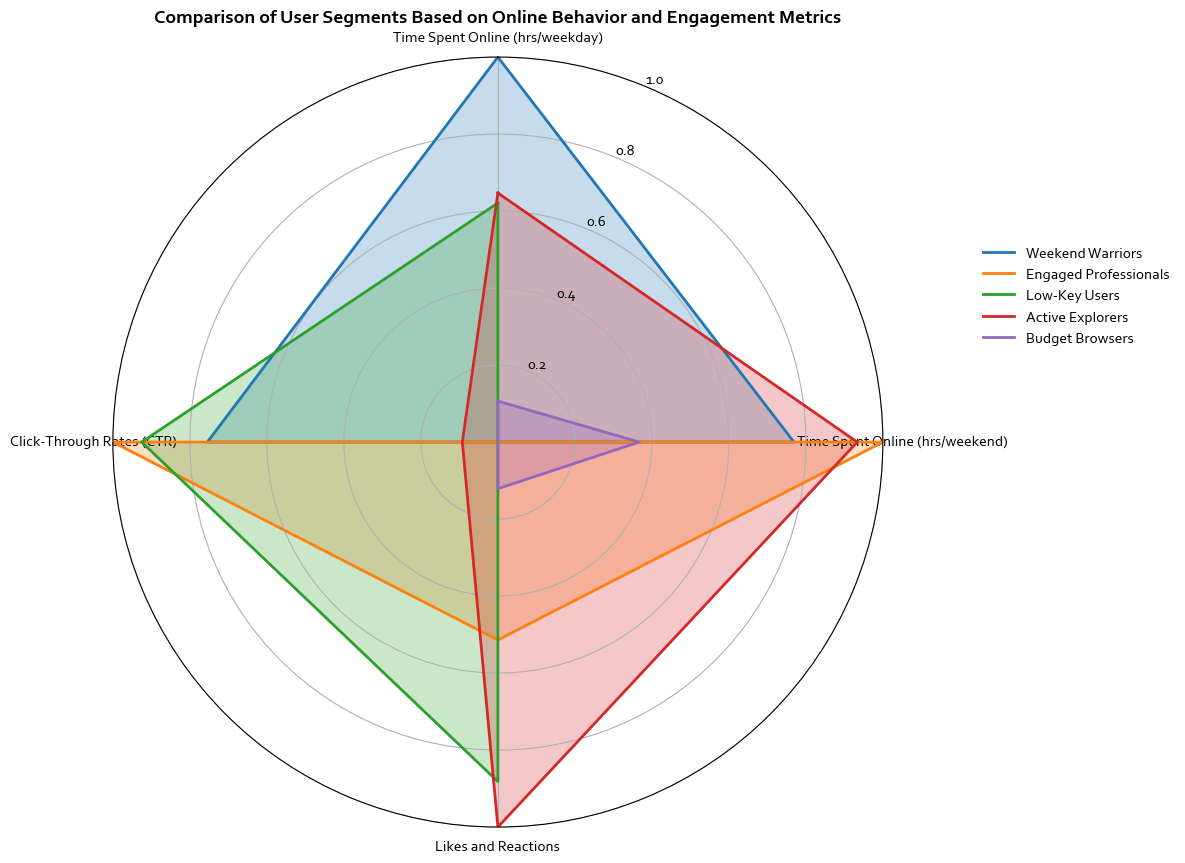

In [233]:
features_to_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 
                    'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_to_plot)


radar_df = cluster_means[features_to_plot]
radar_df_normalized = radar_df.copy()
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min()) / (radar_df[feature].max() - radar_df[feature].min())

# Adding a full circle for plotting
radar_df_normalized = pd.concat([radar_df_normalized, radar_df_normalized.iloc[:1]], ignore_index=True)
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']


num_vars = len(features_to_plot)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the radar chart

fig, ax = plt.subplots(figsize=(14, 10), subplot_kw=dict(polar=True))

# Plot each segment
for i, segment in enumerate(segment_names):
    values = radar_df_normalized.iloc[i].values.tolist()
    values += values[:1]  # Close the radar chart
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=segment)
    ax.fill(angles, values, alpha=0.25)

# Add labels to the chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features_to_plot)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
#ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], color="grey", size=12, fontweight='bold')
ax.set_ylim(0, 1)

# Add a title and legend
plt.title('Comparison of User Segments Based on Online Behavior and Engagement Metrics', size=14, color="black", fontweight='bold', pad=25.1)
plt.legend(
    loc='center right',  # Place legend at the top center
    bbox_to_anchor=(1.39, 0.69),  # Adjust position to be above the plot
    ncol=1,  # Number of columns in the legend
    frameon=False  # Remove the outline around the legend
)
plt.savefig('Cluster_analysis.png',)
plt.show()

The chart above is useful for marketers to understand the behaviour of different user segments and tailor their advertising strategies accordingly. For example, ads targeting the **Weekend Warriors** could be scheduled for the weekend when they are most active, while “Engaged Professionals” might respond better to ads that are spread evenly throughout the week.